In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import numpy.linalg as ln
import matplotlib.pyplot as plt
 

In [ ]:
from IPython import display

In [ ]:
def func(vector):
  X, Y = vector[0], vector[1]
  
  return 10000*(X**2 - Y)**2 + (X - 1)**2



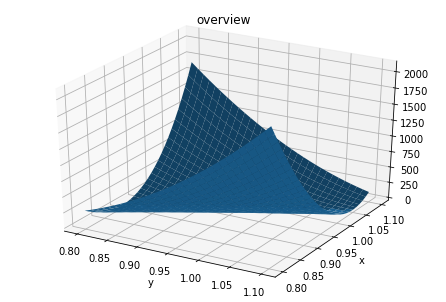

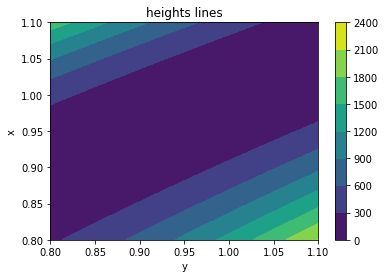

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(0.8, 1.1, 0.01)
y = np.arange(0.8, 1.1, 0.01)

X, Y = np.meshgrid(x, y)


nu = 10000*(X**2 - Y)**2 + (X - 1)**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(Y, X, nu)
plt.title('overview')
plt.xlabel('y')
plt.ylabel('x')
plt.show()

plt.title('heights lines')
plt.contourf(Y, X, nu)
plt.colorbar()
plt.xlabel('y')
plt.ylabel('x')
plt.show()

We can see that on 

First attemt is default gradient descent  

In [ ]:
def gradient_func(vector):
  X = vector[0]
  Y = vector[1]
  return np.array([40000 * X **3 - 40000 * X * Y + 2 * X - 2, 20000 * (Y - X**2)])


def gradient_descent(gradient, start, learn_rate, n_iter):
    vector = np.copy(start)
    for _ in range(n_iter):
        #print('vector: ', vector) 
        #print('gradient: ', gradient(vector))
        diff = -learn_rate * gradient(vector)
        #if np.all(np.abs(diff) <= tolerance):
        #    print('achived tolerance')
        #    break
        vector += diff
    print('gradient: ', gradient(vector))    
    return vector

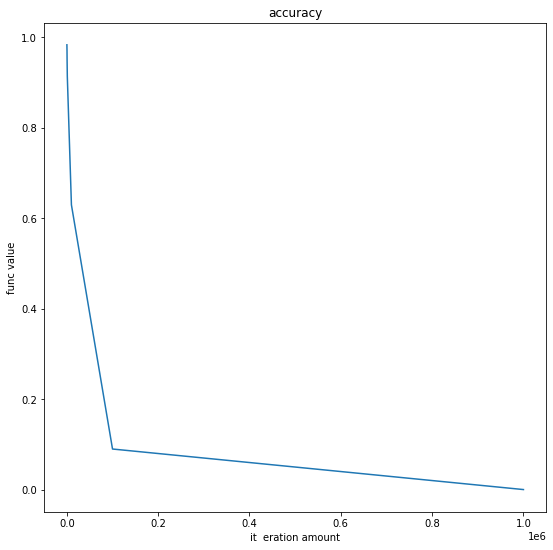

current value: %f 1.2539430477719858e-05


In [ ]:
start = np.array([-1.0, -2.0])
learn_rate = 0.00001
all_sizes = [100, 350, 500, 1000, 10000, 100000, 1000000]

size_history = []
value_history = []

for iteration_amt in all_sizes:
  size_history.append(iteration_amt)
  value_history.append(func(gradient_descent(gradient_func, start, learn_rate, iteration_amt)))

  display.clear_output(wait=True)
  plt.figure(figsize=(9, 9))
  plt.title('accuracy')
  plt.xlabel('it  eration amount')
  plt.ylabel('func value')
  plt.plot(size_history, value_history)
  plt.show()
  print('current value: %f', value_history[-1])

In [ ]:
def nesterov_momentum(func, gradient, start, learn_rate, momentum_rate, tolerance, m_b):
  points_history = []
  counter = 0
  # F(1,1) = 0 - minimum of our function
  vector = np.copy(start)
  #points_history.append(vector)
  momentum = np.array(m_b)
  while abs(func(vector)) > tolerance:
      momentum = momentum_rate * momentum + (1 - momentum_rate) * learn_rate * gradient(vector - momentum_rate * momentum)
      vector -= momentum
      points_history.append(np.copy(vector))
      counter+=1

  return vector, counter, points_history


In [ ]:
def movment_picture(history):
  history = np.array(history)

  plt.figure(figsize=(12, 7)) 

  x = np.arange(-2.5, 1.5, 0.01)
  y = np.arange(-2.5, 1.5, 0.01)
  
  X, Y = np.meshgrid(x, y)
  nu = 10000*(X**2 - Y)**2 + (X - 1)**2
  
  plt.xlim((-2.5, 1.5))
  plt.ylim((-2.5, 1.5))
  
  plt.contourf(Y, X, nu)
  plt.scatter(history[:, 0], history[:,1], color='b')

  plt.xlabel('y')
  plt.ylabel('x')
  plt.show()

ans, cnt:  [0.96837758 0.93775384] 412067


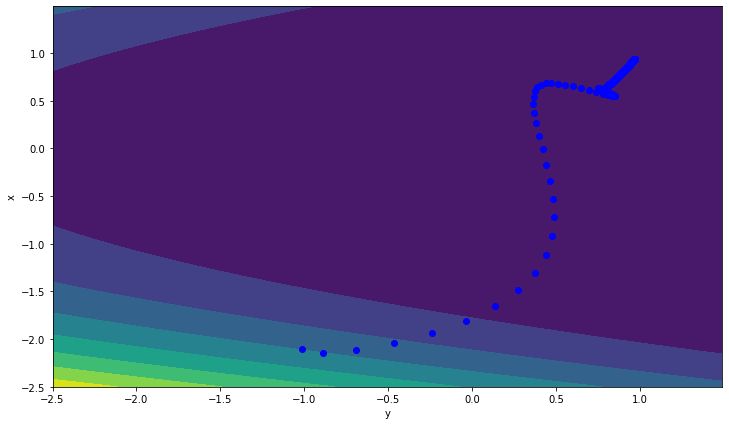

In [ ]:


start = np.array([-1.0, -2.0])
learn_rate = 0.00001
all_sizes = [100, 350, 500, 1000, 10000, 100000, 1000000]

ans, cnt, history = nesterov_momentum(func, gradient_func, start, learn_rate, 0.90, 1e-3, [0.2, 0.2])
print('ans, cnt: ', ans, cnt)

movment_picture(history)

In [ ]:
def adam(func, gradient, start, learn_rate, momentum_rate=0.9, rms_rate=0.999, save_history=False, tolerance=1e-3):
  eps = 1e-8
  points_history = []
  counter = 1
  # F(1,1) = 0 - minimum of our function
  vector = np.copy(start)
  #points_history.append(vector)
  m = np.array([0.0,0.0])
  v = np.array([0.0,0.0])
  #while ln.norm(vector) > tolerance:
  while abs(func(vector)) > tolerance:
      #gradient(vector - momentum_rate * momentum)
      g = gradient(vector)
      m = momentum_rate * m + (1 - momentum_rate) * g 
      v = rms_rate * v + (1 - rms_rate) * g * g 

      m_corr = m / (1 - momentum_rate**counter)
      v_corr = v / (1 - rms_rate**counter)

      vector -= learn_rate * m_corr / (np.sqrt(v_corr) + eps)
      
      if save_history:
        points_history.append(np.copy(vector))
      counter+=1

  return vector, counter-1, points_history


In [ ]:
start = np.array([-1.0, -2.0])
learn_rate = 0.009
learn_rate_range = np.linspace(0.005, 0.025, 10)
m_range = np.linspace(0.9, 0.98, 10)
v_range = np.linspace(0.9, 0.999, 10)
best_cnt = 1e10

m_best, v_best = 0.9, 0.9

#for learn_rate in learn_rate_range:
for m in m_range:
  for v in v_range:
    ans, cnt, history = adam(func, gradient_func, start, learn_rate, momentum_rate=m, rms_rate=v)
    #print('m, v, cnt: ', m, v, cnt)
    if (cnt < best_cnt):
      best_cnt = cnt
      m_best = m
      #learn_rate_best = learn_rate
      v_best = v

print('best m, v: ', m_best, v_best)


best m, v:  0.98 0.977


In [ ]:
learn_rate_range = np.linspace(0.01, 0.025, 100)
learn_rate_best = learn_rate_range[0]
for learn_rate in learn_rate_range:
  ans, cnt, history = adam(func, gradient_func, start, learn_rate, momentum_rate=m_best, rms_rate=v_best)
  #print('learn_rate, cnt: ', learn_rate, cnt)
  if (cnt < best_cnt):
    best_cnt = cnt
    learn_rate_best = learn_rate

print('best rate: ', learn_rate_best)

best rate:  0.02015151515151515


ans, cnt:  [1.02770922 1.05610438] 266


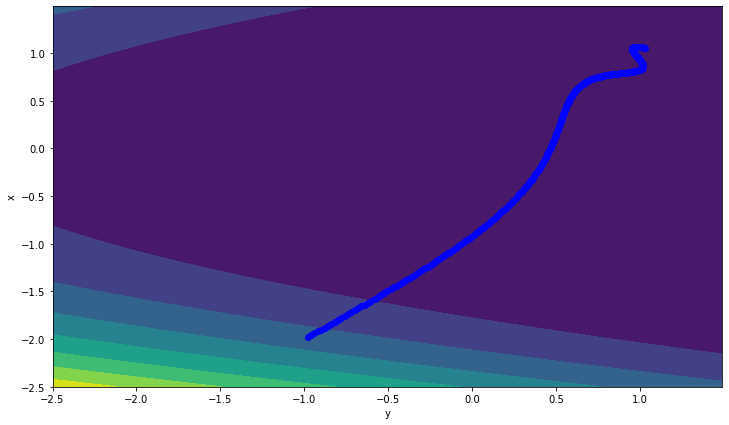

In [ ]:
ans, cnt, history = adam(func, gradient_func, start, learn_rate=learn_rate_best, momentum_rate=m_best, rms_rate=v_best, save_history=True)
print('ans, cnt: ', ans, cnt)
movment_picture(history)

As we can see, having successfully selected the hyperparameters, we got the desired number of iterations.

However lets try the approach in which it is not required to iterate over hyperparameters.

Now lets turn to Quasi-Newton methods, specific to the BFGS approach.

Unlike Newton's method, this method doesn't use the Hessian, but calculates it approximately. This approach allows us to speed up the gradient approach. On other hand it's unlikely to get a quadratic convergence like Newton.

In [ ]:
import scipy as sp
import scipy.optimize

In [ ]:
def BFGS(func, gradient, start, maxiter=None, tolerance=1e-3, save_history=False):
  if maxiter is None:
    maxiter = 10000

  history = []

  I = np.eye(start.shape[0], dtype=int)
  k = 0
  vector = np.copy(start)
  H = np.eye(start.shape[0])
  g = gradient(vector)  
  alpha = 1

  while np.sqrt(ln.norm(g)) > tolerance and k < maxiter:
    p = - np.dot(H, g)  

    line_search = sp.optimize.line_search(func, gradient, vector, p, maxiter=20)
    alpha = line_search[0] if line_search[0] is not None else alpha


    new_vector = vector + alpha * p
    s = new_vector - vector
    vector = new_vector
    
    new_g =gradient(vector) 
    y = new_g - g
    g = new_g
    
    k += 1


    # calculating new H
    ro = 1.0 / np.dot(y, s)
    
    A1 = I - ro * s[:, np.newaxis] * y[np.newaxis, :]
    A2 = I - ro * y[:, np.newaxis] * s[np.newaxis, :]
    H = np.dot(A1, np.dot(H, A2)) + (ro * s[:, np.newaxis] * s[np.newaxis, :])

    history.append(np.copy(vector))

  return vector, k, history

  # find alpha coef by Brazilai-Borwein aproach
  #alpha = 

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


answer point:  0.9999999995232844 0.9999999990423096
iteration count:  139


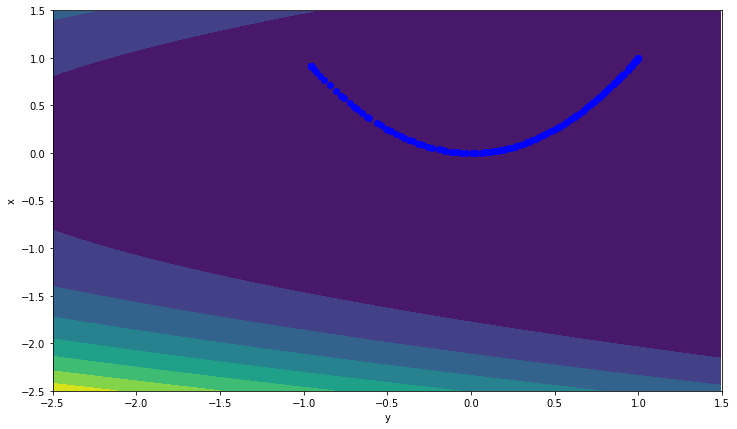

In [ ]:
start = np.array([-1.0, -2.0])
ans, cnt, history = BFGS(func, gradient_func, start, save_history=True)
print('answer point: ', *ans)
print('iteration count: ',cnt)
movment_picture(history)

Obviously, the new algorithm shows itself unambiguously better than the previous one. 

Also it does not require selection of hyperparameters

In [ ]:
start = [-1.0, -2.0]
scipy.optimize.minimize(func, start, method='BFGS', options={'gtol': 1e-6, 'disp': True}, jac=gradient_func)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 173
         Function evaluations: 219
         Gradient evaluations: 219


      fun: 1.3143639600598849e-18
 hess_inv: array([[0.50194839, 1.00385827],
       [1.00385827, 2.00769026]])
      jac: array([-4.11625123e-07,  2.05304662e-07])
  message: 'Optimization terminated successfully.'
     nfev: 219
      nit: 173
     njev: 219
   status: 0
  success: True
        x: array([1., 1.])

In [ ]:
res = scipy.optimize.minimize(func, start, method='L-BFGS-B', options={'disp': True}, jac=gradient_func)
res

      fun: 2.13336215023052e-14
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.91564196e-05, -1.96861238e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 106
      nit: 80
     njev: 106
   status: 0
  success: True
        x: array([0.99999989, 0.99999978])

We can see that scipy preform 173 iterations with BFGS and 80 iterations with L-BFGS-B method.
But scipy haven't got    method. Our functions is 2 dimentional, and L-BFGS-B method is used for functions of large dimensions.
